# Assignment 01-07-20

# CSE-221710304037-N.kushwanth

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
df.drop("CASENUM",axis=1,inplace=True)
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df.shape

(1340, 6)

In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
df['CLMSEX']=df.CLMSEX.fillna(df.CLMSEX.mode()[0])

In [7]:
df['CLMINSUR']=df.CLMINSUR.fillna(df.CLMINSUR.mode()[0])

In [8]:
df['SEATBELT']=df.SEATBELT.fillna(df.SEATBELT.mode()[0])

In [9]:
df['CLMAGE']=df.CLMAGE.fillna(df.CLMAGE.median())

In [10]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [11]:
a=df[df.duplicated()]
a

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
77,1,1.0,1.0,0.0,30.0,0.000
162,1,1.0,1.0,0.0,30.0,0.800
439,1,0.0,1.0,0.0,57.0,3.889
697,1,0.0,1.0,0.0,30.0,0.400
773,0,0.0,1.0,0.0,30.0,4.395
779,1,1.0,1.0,0.0,30.0,0.000
788,1,0.0,1.0,0.0,30.0,0.150
834,0,1.0,1.0,0.0,48.0,1.050
866,1,1.0,1.0,0.0,30.0,0.300
922,1,1.0,1.0,0.0,30.0,0.500


In [12]:
a.shape

(30, 6)

In [13]:
df.drop(a.index,inplace=True)

In [14]:
df.shape

(1310, 6)

In [15]:
x=df.drop("ATTORNEY",axis=1)
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,30.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [16]:
y=df.ATTORNEY
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1310, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(917, 5)
(917,)
(393, 5)
(393,)


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\saisrinivas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report

In [22]:
accuracy_score(y_test,y_pred)

0.6819338422391857

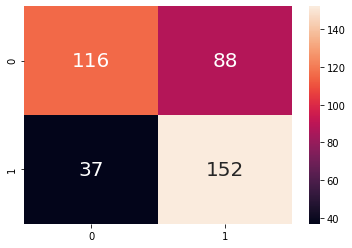

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",annot_kws={'size':20})

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65       204
           1       0.63      0.80      0.71       189

    accuracy                           0.68       393
   macro avg       0.70      0.69      0.68       393
weighted avg       0.70      0.68      0.68       393



In [25]:
roc_auc_score(y_test,y_pred)

0.6864301276065983

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
scores=[]
for k in range(1,36):
    knn_t=KNeighborsClassifier(n_neighbors=k)
    knn_t.fit(x_train,y_train)
    knn_y_pred_t=knn_t.predict(x_test)
    scores.append(accuracy_score(y_test,knn_y_pred_t))
scores

[0.6132315521628499,
 0.6055979643765903,
 0.628498727735369,
 0.6437659033078881,
 0.638676844783715,
 0.6666666666666666,
 0.6615776081424937,
 0.6717557251908397,
 0.6768447837150128,
 0.6870229007633588,
 0.6819338422391857,
 0.6844783715012722,
 0.6743002544529262,
 0.6870229007633588,
 0.6743002544529262,
 0.6819338422391857,
 0.6793893129770993,
 0.6819338422391857,
 0.6844783715012722,
 0.6895674300254453,
 0.6946564885496184,
 0.6870229007633588,
 0.6972010178117048,
 0.6895674300254453,
 0.6793893129770993,
 0.6895674300254453,
 0.6844783715012722,
 0.6921119592875318,
 0.6921119592875318,
 0.6895674300254453,
 0.6972010178117048,
 0.6895674300254453,
 0.6972010178117048,
 0.6997455470737913,
 0.6972010178117048]

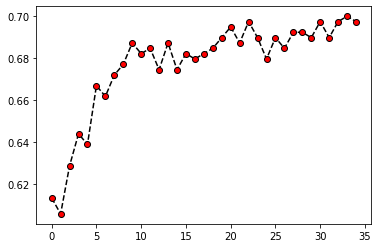

In [28]:
plt.plot(scores,'k--',marker='o',markerfacecolor='red')

When k=34 there is a high accuracy

In [29]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)

In [30]:
accuracy_score(y_test,knn_y_pred)

0.6997455470737913

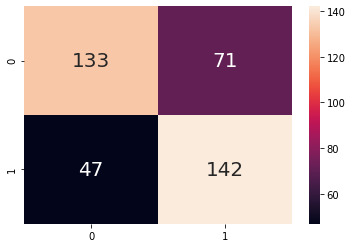

In [31]:
sns.heatmap(confusion_matrix(y_test,knn_y_pred),annot=True,fmt="d",annot_kws={'size':20})

In [32]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       204
           1       0.67      0.75      0.71       189

    accuracy                           0.70       393
   macro avg       0.70      0.70      0.70       393
weighted avg       0.70      0.70      0.70       393



In [33]:
roc_auc_score(y_test,knn_y_pred)

0.7016417678182384

In [34]:
m_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thres=roc_curve(y_test,m_prob,pos_label=1)

In [35]:
knn_m_prob=knn.predict_proba(x_test)[:,1]
knn_fpr,knn_tpr,knn_thres=roc_curve(y_test,m_prob,pos_label=1)

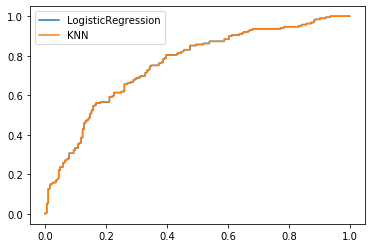

In [36]:
plt.plot(fpr,tpr)
plt.plot(knn_fpr,knn_tpr)
plt.legend(["LogisticRegression","KNN"])

Both Models having almost same accuracy
<br><b>LogisticRegression model</b> accuracy_score=0.6864301276065983
<br><b>KNearestClassifier model</b> accuracy_score=0.6997455470737913
<br>This is why we have same curve in the roc_curve